# =====================================================================================================================================================
#                         Project Title :  Iris Flower Classification Project using Decision Tree, KNN, and SVM 
# =====================================================================================================================================================

## 📌 Objective
The goal of this project is to classify Iris flowers into one of three species:
- **Iris-setosa**
- **Iris-versicolor**
- **Iris-virginica**

Based on the following measurements:
- Sepal Length
- Sepal Width
- Petal Length
- Petal Width

This project demonstrates **basic classification concepts** using **Machine Learning**.

---

## 📊 Dataset Information
- **Source:** Kaggle (Iris Flower Dataset)
- **Filename Used:** `Iris.csv`
- Contains **150 samples** with **4 input features** and **1 target label (Species)**

---

## ✅ Models Used for Classification
| Model | Algorithm Type |
|--------|----------------|
| Decision Tree | Tree-Based |
| KNN (K-Nearest Neighbors) | Distance-Based |
| SVM (Support Vector Machine) | Margin-Based |

We will **train, evaluate, compare performance**, and **allow prediction using user-provided values**.


In [14]:
# ============================================
# Cell 2: Import Required Libraries
# ============================================
import pandas as pd
import numpy as np

# Models
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Preprocessing & Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
# ============================================
# Cell 3: Load the Dataset
# ============================================
df = pd.read_csv("Iris.csv")
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
# ============================================
# Cell 4: Check for Missing / Null Values
# ============================================
print("🔍 Checking for Null Values:")
print(df.isnull().sum())

print("\n🔍 Checking for Duplicate Rows:")
print("Total Duplicates:", df.duplicated().sum())


🔍 Checking for Null Values:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

🔍 Checking for Duplicate Rows:
Total Duplicates: 0


In [17]:
# ============================================
# Cell 5: Basic Data Exploration
# ============================================
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nUnique Species:", df['Species'].unique())

df.describe()


Dataset Shape: (150, 6)

Column Names: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

Unique Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [18]:
# ============================================
# Cell 6: Train-Test Split
# ============================================
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# ============================================
# Cell 7: Train Models (Decision Tree, KNN, SVM)
# ============================================
dt_model = DecisionTreeClassifier(random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
svm_model = SVC(kernel='linear')

dt_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [20]:
# ============================================
# Cell 8: Evaluate Each Model
# ============================================
models = {'Decision Tree': dt_model, 'KNN': knn_model, 'SVM': svm_model}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n🔹 {name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred))



🔹 Decision Tree Accuracy: 1.00
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


🔹 KNN Accuracy: 1.00
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


🔹 SVM Accuracy: 1.00
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-

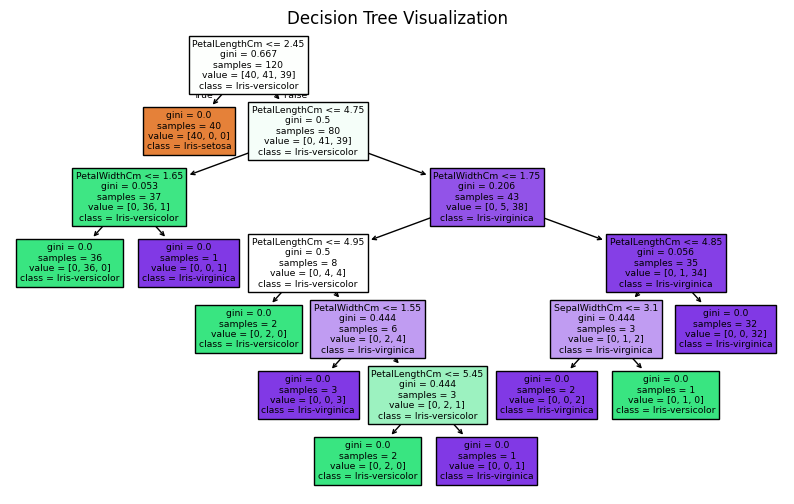

In [21]:
# ============================================
# Cell 9: Visualize Decision Tree
# ============================================
plt.figure(figsize=(10,6))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=y.unique())
plt.title("Decision Tree Visualization")
plt.show()


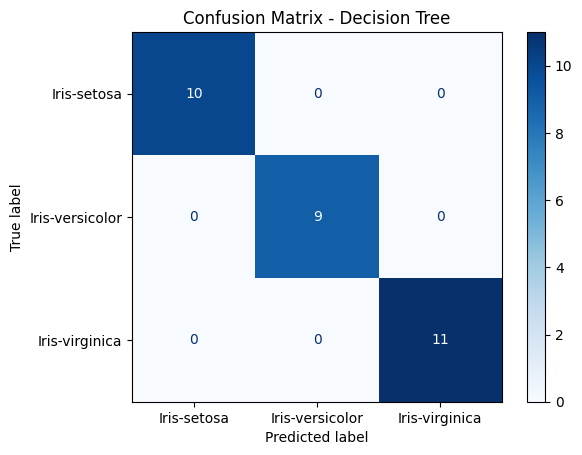

In [22]:
# ============================================
# Cell 10: Plot Confusion Matrix (for Best Model — Decision Tree)
# ============================================
from sklearn.metrics import ConfusionMatrixDisplay

y_pred_dt = dt_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_dt)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.show()


In [23]:
# ============================================
# Cell 11: Prediction Function (Option 2)
# ============================================
def predict_species(input_list):
    """
    input_list format: [SepalLength, SepalWidth, PetalLength, PetalWidth]
    Example: predict_species([5.1, 3.5, 1.4, 0.2])
    """
    input_array = np.array(input_list).reshape(1, -1)
    prediction = dt_model.predict(input_array)
    return f"Predicted Species: {prediction[0]}"

# Example usage
predict_species([5.1, 3.5, 1.4, 0.2])


C:\Users\Hassan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


'Predicted Species: Iris-setosa'